<a href="https://colab.research.google.com/github/Y-Srivaishnavi/attrition-prediction/blob/main/HRModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/G-project/datasets/hranalytics/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
def show_basics(data):
    a = pd.DataFrame()
    a['Missing Value'] = df.isnull().sum()
    a['No. of unique Value'] = df.nunique()
    a['dtype'] = df.dtypes
    return a
show_basics(df)

,Missing Value,No. of unique Value,dtype
Age,0,43,int64
Attrition,0,2,object
BusinessTravel,0,3,object
DailyRate,0,886,int64
Department,0,3,object
DistanceFromHome,0,29,int64
Education,0,5,int64
EducationField,0,6,object
EmployeeCount,0,1,int64
EmployeeNumber,0,1470,int64


from matplotlib import pyplot as plt
_df_0['No. of unique Value'].plot(kind='hist', bins=20, title='No. of unique Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('dtype').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Missing Value']
  ys = series['No. of unique Value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Missing Value', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dtype')):
  _plot_series(series, series_name, i)
  fig.legend(title='dtype', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Missing Value')
_ = plt.ylabel('No. of unique Value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Missing Value']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Missing Value'}, axis=1)
              .sort_values('Missing Value', ascending=True))
  xs = counted['Missing Value']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Missing Value', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dtype')):
  _plot_series(series, series_name, i)
  fig.legend(title='dtype', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Missing Value')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['No. of unique Value'].plot(kind='line', figsize=(8, 4), title='No. of unique Value')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['dtype'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='No. of unique Value', y='dtype', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

`EmployeeCount`, `Over18`, and `StandardHours` can be dropped as they have only 1 unique value.

<Axes: >

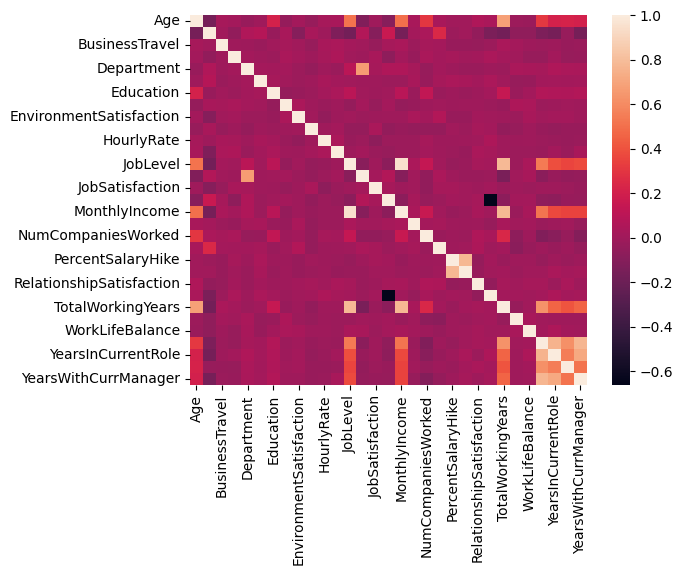

In [26]:
import seaborn as sns

sns.heatmap(df.corr(), annot=False)

In [6]:
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

Numeric (discrete or continous values) will be manually typed in, while categorical ones will have a drop-down.

In [8]:
from sklearn.preprocessing import LabelEncoder

model_trans = LabelEncoder()

nonint_attributes = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

for attribute in nonint_attributes:
  df[attribute] = model_trans.fit_transform(df[attribute])

In [9]:
df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


`EmployeeNumber` can be dropped as it is simply an index.

In [10]:
df = df.drop(['EmployeeNumber'], axis=1)

In [11]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [20]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:", classification_report(y_test, y_pred), sep="\n")

Accuracy: 0.8571428571428571

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       0.86      0.13      0.22        47

    accuracy                           0.86       294
   macro avg       0.86      0.56      0.57       294
weighted avg       0.86      0.86      0.81       294



In [28]:
import pickle

pickle.dump(model, open('modelAttrition.pkl', 'wb'))
pickle.dump(model_trans, open('labelEncoder.pkl', 'wb'))